# Final Project
## Udacity ND - Machine Learning

This Jupyter notebook describes the process ...

From April 18, Kickstart has funded 141,822 projects therouh 14,449,279 backers. It has currently 3,728 projects live.

The Stomping Land raised 114,060 and provided some updates then completely vanished. Artists who worked on the game never got paid. The guy running the campaign ran off with all the money and then still had the balls to put the unfinished game up on Steam anyway.

Xeko raised 257,870 and was meant to be a video game based on a previously released pokemon ripoff card/board game. There were a few sorry for the delay updates and then nothing. Then a post was made in the comments section saying that the person who ran the kickstarter actually didn't own the rights to the IP and was being sued by the creator of the original card game. Apparently it ended up costing 180k in legal fees, where the other 77k went isn't explained. The campaign creator dismissed this by claiming that there was only 40 legitimate backers and most of the money had come from friends and family so nobody had the right to complain. This was obviously bullshit since there was thousands of backers.

Kaiju Combat raised 112,513 and claimed development was going well despite only ever being able to show one piece of artwork of one monster character. The excuse was one of the designers passed away (which is true) and then everyone else working on the game couldn't continue working without this one particular artist. That was it, they just never even tried to finish it.

Code hero raised 170,954 then gave regular updates with no progress and just continual excuses for delays. The campaign creator apparently hired 10 legit developers and promised to pay them 50k a year. 10 devs, 50k p/a, 170k budget, you do the math. One of the devs claimed all his paychecks bounced and the guy running the campaign asked everyone to work for free, which they didn't, then he just disappeared. Recently the same guy setup a website for the same game and is trying to sell pre-order copies but still hasn't responded to any of the kickstarter backers.

Greed Monger (lol) raised 90,132 and the guy running it was an entrepreneur who ran a long list of businesses, none of which were game development, and infamously appeared on a reality tv swingers show. He recruited some guy with serious mental health issues who he found on the Unity forums, although he didn't pay him anything. This guy then tried to put an MMORPG together using nothing but Unity store bought assets. The hired help got sick of working for free and quit working on the game then dumped a bunch of skype chat conversations to show what a dirtbag the campaign creator was. The creator then disappeared with all the money and the game was abandoned

# Exploratory Data Analysis

The first step is to analyze the data through exploratory data analysis. In this process we get to know the data organization and distribution



In [1]:
# importing libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="darkgrid")
sns.set(rc={"figure.figsize": (10, 8)})

# setting data folders

folder_raw = '../data/raw/'
folder_result = '../data/processed/'
folder_interim = '../data/interim/'

In [2]:
# loading the data
# https://www.reddit.com/r/shittykickstarters/comments/5h9rtv/5_video_game_kickstarters_that_ran_away_with_your/
df_kickstart = pd.read_csv(folder_raw+'ks-projects-201801.csv', encoding='latin')

print('Data has {} rows'.format(df_kickstart.shape[0]))
display(df_kickstart.head())
display(df_kickstart.info())
display(df_kickstart.describe())


Data has 378661 rows


,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 15 columns):
ID                  378661 non-null int64
name                378657 non-null object
category            378661 non-null object
main_category       378661 non-null object
currency            378661 non-null object
deadline            378661 non-null object
goal                378661 non-null float64
launched            378661 non-null object
pledged             378661 non-null float64
state               378661 non-null object
backers             378661 non-null int64
country             378661 non-null object
usd pledged         374864 non-null float64
usd_pledged_real    378661 non-null float64
usd_goal_real       378661 non-null float64
dtypes: float64(5), int64(2), object(8)
memory usage: 43.3+ MB


None

,ID,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real
count,3.786610e+05,3.786610e+05,3.786610e+05,378661.000000,3.748640e+05,3.786610e+05,3.786610e+05
mean,1.074731e+09,4.908079e+04,9.682979e+03,105.617476,7.036729e+03,9.058924e+03,4.545440e+04
std,6.190862e+08,1.183391e+06,9.563601e+04,907.185035,7.863975e+04,9.097334e+04,1.152950e+06
min,5.971000e+03,1.000000e-02,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,1.000000e-02
25%,5.382635e+08,2.000000e+03,3.000000e+01,2.000000,1.698000e+01,3.100000e+01,2.000000e+03
50%,1.075276e+09,5.200000e+03,6.200000e+02,12.000000,3.947200e+02,6.243300e+02,5.500000e+03
75%,1.610149e+09,1.600000e+04,4.076000e+03,56.000000,3.034090e+03,4.050000e+03,1.550000e+04
max,2.147476e+09,1.000000e+08,2.033899e+07,219382.000000,2.033899e+07,2.033899e+07,1.663614e+08


In [3]:
# setting date data

df_kickstart['launched'] = pd.to_datetime(df_kickstart['launched'])
df_kickstart['deadline'] = pd.to_datetime(df_kickstart['deadline'])

# setting category data

df_kickstart['category'] = pd.Categorical(df_kickstart['category'], categories=df_kickstart['category'].unique(), ordered = False)
df_kickstart['main_category'] = pd.Categorical(df_kickstart['main_category'], categories=df_kickstart['main_category'].unique(), ordered = False)
df_kickstart['state'] = pd.Categorical(df_kickstart['state'], categories=df_kickstart['state'].unique(), ordered = False)
df_kickstart['country'] = pd.Categorical(df_kickstart['country'], categories=df_kickstart['country'].unique(), ordered = False)
df_kickstart['currency'] = pd.Categorical(df_kickstart['currency'], categories=df_kickstart['currency'].unique(), ordered = False)

display(df_kickstart.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 15 columns):
ID                  378661 non-null int64
name                378657 non-null object
category            378661 non-null category
main_category       378661 non-null category
currency            378661 non-null category
deadline            378661 non-null datetime64[ns]
goal                378661 non-null float64
launched            378661 non-null datetime64[ns]
pledged             378661 non-null float64
state               378661 non-null category
backers             378661 non-null int64
country             378661 non-null category
usd pledged         374864 non-null float64
usd_pledged_real    378661 non-null float64
usd_goal_real       378661 non-null float64
dtypes: category(5), datetime64[ns](2), float64(5), int64(2), object(1)
memory usage: 31.1+ MB


None

In [5]:
# checking the variables

print('Checking project negative pledges: {}'.format(df_kickstart[df_kickstart['pledged'] < 0].shape[0]))
print('Checking project negative backers: {}'.format(df_kickstart[df_kickstart['backers'] < 0].shape[0]))
print('Checking project negative usd pledged : {}'.format(df_kickstart[df_kickstart['usd pledged'] < 0].shape[0]))
print('Checking project negative usd_pledged_real: {}'.format(df_kickstart[df_kickstart['usd_pledged_real'] < 0].shape[0]))
print('Checking project negative usd_goal_real: {}'.format(df_kickstart[df_kickstart['usd_goal_real'] < 0].shape[0]))

# checking the projects date
print('Checking projects launched years: {}'.format(df_kickstart['launched'].dt.year.unique()))
print('Checking projects deadline years: {}'.format(df_kickstart['deadline'].dt.year.unique()))


Checking project negative pledges: 0
Checking project negative backers: 0
Checking project negative usd pledged : 0
Checking project negative usd_pledged_real: 0
Checking project negative usd_goal_real: 0
Checking projects launched years: [2015 2017 2013 2012 2016 2014 2010 2011 2009 1970 2018]
Checking projects deadline years: [2015 2017 2013 2012 2016 2014 2011 2018 2010 2009]


In [4]:
# dropping invalid launched years

df_kickstart.drop(df_kickstart[df_kickstart['launched'].dt.year<2009].index, inplace=True)

This shows the data type of each column and the number of non-null objects. Only the 'name' and 'usd pledged' attribute has null values.

Our target variable is the state of the project. We can check how this value is distributed through all possible values.

State values: [failed, canceled, successful, live, undefined, suspended]
Categories (6, object): [failed, canceled, successful, live, undefined, suspended]


Text(0.5,1,'Distribution of state field')

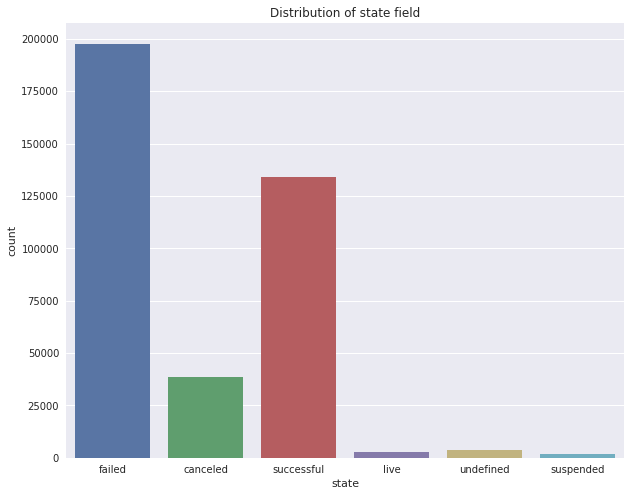

In [49]:
print('State values: {}'.format(df_kickstart['state'].unique()))

plt.figure(figsize=(10,8))
ax = sns.countplot(x=df_kickstart['state'])
ax.set_title('Distribution of state field')

This plot shows that there are more failed projects then successful ones. This should be expected, as anyone can propose a new projects but not everyone will pledge.

There are a few suspended projects. A project can be suspended by the Kickstart team if it violate their rules. 

There are also canceled projects. A project is canceled by the author if, for some reason, she/he decide to gave up of it. 

We can also check the state of the projects through the years

Absolute values:


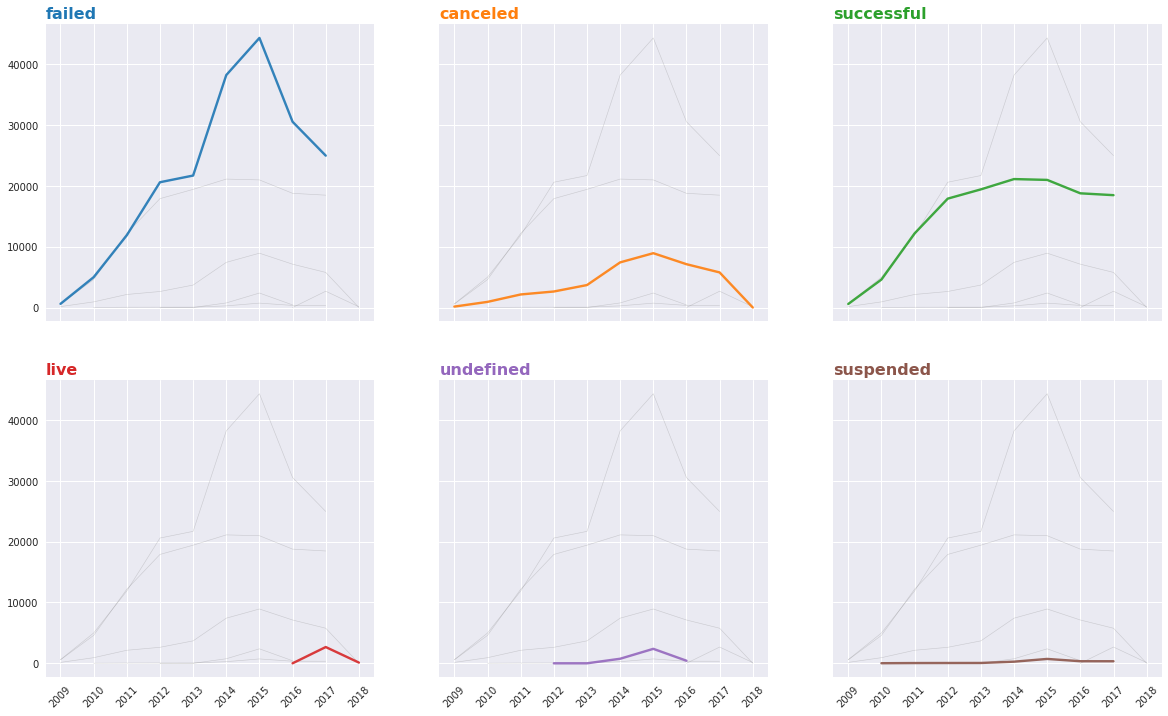

Percentage values:


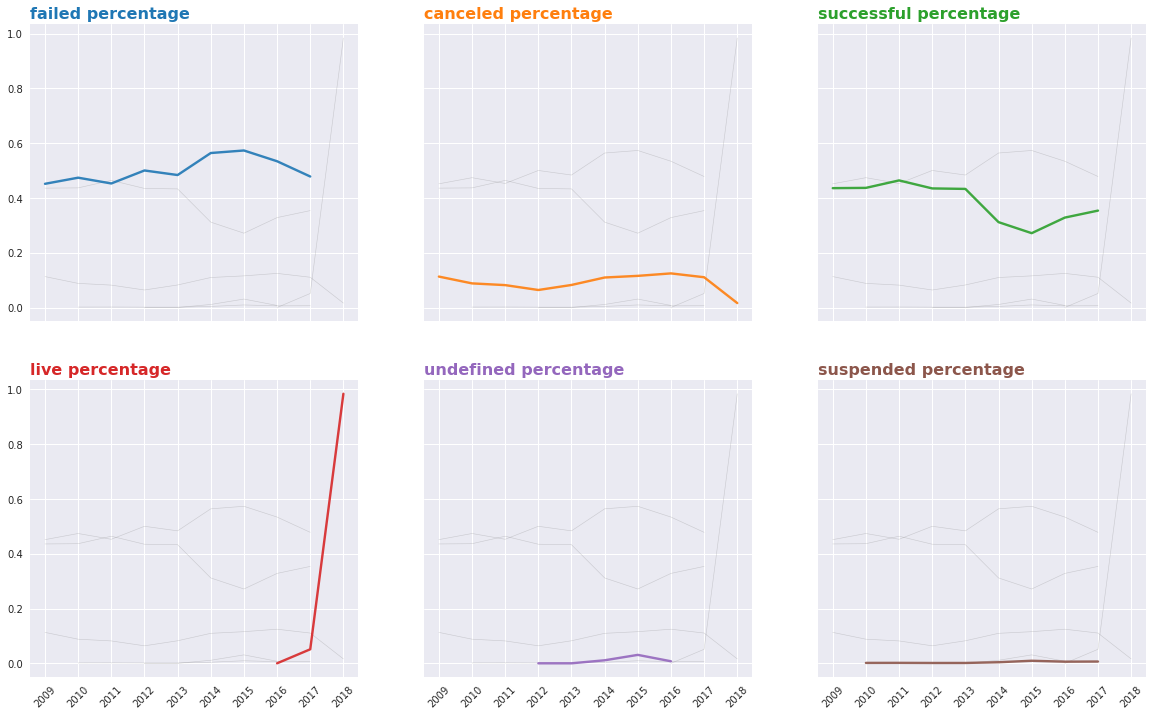

In [6]:
import matplotlib.pyplot as plt
palette = plt.get_cmap('tab10')

#plt.figure(figsize=(10,8))

#for status in df_kickstart['state'].unique():
#    df_aux = df_kickstart[df_kickstart['state']==status] 
#    df_aux = df_aux.groupby(df_aux['launched'].dt.year).size()
#    plt.plot(df_aux, label = status)

#plt.title('Absolute number of projects / status')
#plt.xticks(df_kickstart['launched'].sort_values().dt.year.unique())
#plt.legend()
#plt.show()



#plt.figure(figsize=(10,8))

#for status in df_kickstart['state'].unique():
#    df_aux = df_kickstart[df_kickstart['state']==status] 
#    df_aux = df_aux.groupby(df_aux['launched'].dt.year).size()/df_kickstart['launched'].sort_values().dt.year.value_counts(sort=False)
#    plt.plot(df_aux.index, df_aux, label = status)

#plt.title('Percentage of projects / status')
#plt.xticks(df_kickstart['launched'].sort_values().dt.year.unique())
#plt.legend()
#plt.show()

plt.figure(figsize=(20,12))

print('Absolute values:')

num=0
for status in df_kickstart['state'].sort_values().unique():
    num+=1
    plt.subplot(2,3, num)
 
    for other_status in df_kickstart.loc[df_kickstart['state']!=status,'state'].unique():
        df_plot = df_kickstart[df_kickstart['state']==other_status].groupby(df_kickstart['launched'].dt.year).size()
        plt.plot(df_plot, marker='', color='grey', linewidth=0.6, alpha=0.3)
 
    df_plot = df_kickstart[df_kickstart['state']==status].groupby(df_kickstart['launched'].dt.year).size()
    plt.plot(df_plot, marker='', color=palette(num-1), linewidth=2.4, alpha=0.9, label=status)
 
    #plt.ylim(0,0.4)
    plt.xticks(df_kickstart['launched'].sort_values().dt.year.unique(), rotation=45)

    if num in range(4) :
        plt.tick_params(labelbottom='off')
    if num not in [1,4] :
        plt.tick_params(labelleft='off')

    plt.title(status, loc='left', fontsize=16, fontweight=0,weight='bold', color=palette(num-1) )
#fontproperties='bold', 

plt.show()


plt.figure(figsize=(20,12))

print('Percentage values:')

num=0
for status in df_kickstart['state'].sort_values().unique():
    num+=1
    plt.subplot(2,3, num)
 
    for other_status in df_kickstart.loc[df_kickstart['state']!=status,'state'].unique():
        df_plot = df_kickstart[df_kickstart['state']==other_status].groupby(df_kickstart['launched'].dt.year).size()/df_kickstart['launched'].sort_values().dt.year.value_counts(sort=False)
        plt.plot(df_plot, marker='', color='grey', linewidth=0.6, alpha=0.3)
 
    df_plot = df_kickstart[df_kickstart['state']==status].groupby(df_kickstart['launched'].dt.year).size()/df_kickstart['launched'].sort_values().dt.year.value_counts(sort=False)
    plt.plot(df_plot, marker='', color=palette(num-1), linewidth=2.4, alpha=0.9, label=status)
 
    #plt.ylim(0,0.4)
    plt.xticks(df_kickstart['launched'].sort_values().dt.year.unique(), rotation=45)

    if num in range(4) :
        plt.tick_params(labelbottom='off')
    if num not in [1,4] :
        plt.tick_params(labelleft='off')

    plt.title(status+' percentage', loc='left', fontsize=16, fontweight=0,weight='bold', color=palette(num-1) )
#fontproperties='bold', 

plt.show()


Now we have a clear picture of the state from the projects. Kickstarter....

As we are looking to predict only the failed and successful state, the others will be removed from the dataset.

Now lets check how much money the projects are asking.

In [5]:
df_kickstart = df_kickstart[df_kickstart['state'].isin(['failed', 'successful'])]
df_kickstart['state'] = pd.Categorical(df_kickstart['state'], categories=df_kickstart['state'].unique())

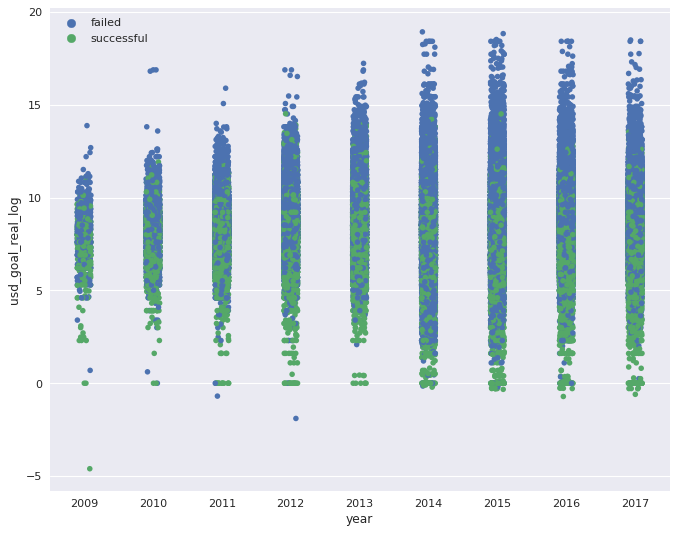

In [17]:
plt.figure(figsize=(10,8), dpi=80)
df_kickstart['year'] = df_kickstart['launched'].dt.year
df_kickstart['usd_goal_real_log'] = np.log(df_kickstart['usd_goal_real'])
#for status in df_kickstart['state'].unique():
    #df_aux = df_kickstart[df_kickstart['state']==status] 
    #plt.scatter(df_aux['launched'].dt.year,df_aux['usd_goal_real'], label=status)
sns.stripplot(x='year', y='usd_goal_real_log', data=df_kickstart, hue='state', jitter=1)
#sns.distplot(df_kickstart.loc[df_kickstart['goal']>0,'goal'])
del df_kickstart['year']
del df_kickstart['usd_goal_real_log']
plt.legend()
plt.show()

In [156]:
for status in df_kickstart['state'].unique():
    df_aux = df_kickstart[df_kickstart['state']==status]
    print(status)
    display(df_aux.describe())

failed


,ID,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real,pledged_log,goal_log,goal_percentage,period,pledged_per_backer
count,1.977190e+05,1.977190e+05,1.977190e+05,197719.000000,197614.000000,197719.000000,1.977190e+05,197719.000000,197719.000000,197719.000000,197719.000000,1.590630e+05
mean,1.074639e+09,6.734685e+04,1.426971e+03,16.422352,1133.741030,1320.603817,6.317474e+04,4.219194,8.890796,0.090620,34.173352,inf
std,6.192215e+08,1.447227e+06,9.564415e+03,71.224123,6221.653617,6820.249351,1.435683e+06,2.916326,1.676249,0.151825,13.175104,NaN
min,5.971000e+03,1.500000e-01,0.000000e+00,0.000000,0.000000,0.000000,1.500000e-01,0.000000,0.139762,0.000000,0.000000,1.000000e+00
25%,5.385642e+08,2.500000e+03,3.000000e+00,1.000000,0.000000,2.640000,2.500000e+03,1.291984,7.824446,0.000303,29.000000,1.550000e+01
50%,1.073242e+09,7.500000e+03,1.000000e+02,3.000000,66.000000,100.000000,7.500000e+03,4.615121,8.922792,0.017143,29.000000,3.486071e+01
75%,1.611052e+09,2.000000e+04,6.710000e+02,12.000000,512.000000,663.000000,2.000000e+04,6.498282,9.903538,0.112750,39.000000,6.644444e+01
max,2.147467e+09,1.000000e+08,1.748630e+06,6550.000000,721036.460000,757352.940000,1.663614e+08,13.537586,18.929673,1.079700,91.000000,inf


successful


,ID,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real,pledged_log,goal_log,goal_percentage,period,pledged_per_backer
count,1.339560e+05,1.339560e+05,1.339560e+05,133956.000000,1.338510e+05,1.339560e+05,1.339560e+05,133956.000000,133956.000000,133956.000000,133956.000000,1.339560e+05
mean,1.073727e+09,1.016296e+04,2.409978e+04,263.921362,1.735603e+04,2.267080e+04,9.532853e+03,8.555787,8.127772,8.557548,31.156469,inf
std,6.191514e+08,3.124829e+04,1.584713e+05,1504.580142,1.301228e+05,1.510903e+05,2.796144e+04,1.557498,1.545013,444.524971,11.771117,NaN
min,2.110900e+04,1.000000e-02,1.000000e+00,0.000000,0.000000e+00,7.900000e-01,1.000000e-02,0.582216,0.009950,0.853222,0.000000,1.000000e+00
25%,5.354443e+08,1.250000e+03,1.977750e+03,33.000000,1.162000e+03,2.000000e+03,1.301915e+03,7.601402,7.172359,1.046429,29.000000,4.020833e+01
50%,1.076595e+09,3.923000e+03,5.117000e+03,71.000000,3.655660e+03,5.107250e+03,3.837740e+03,8.538612,8.252899,1.166667,29.000000,6.278984e+01
75%,1.608161e+09,1.000000e+04,1.344025e+04,167.000000,1.042600e+04,1.323208e+04,1.000000e+04,9.490475,9.210440,1.631407,33.000000,1.030000e+02
max,2.147476e+09,2.000000e+06,2.033899e+07,219382.000000,2.033899e+07,2.033899e+07,2.015609e+06,16.828050,14.516432,104277.890000,91.000000,inf


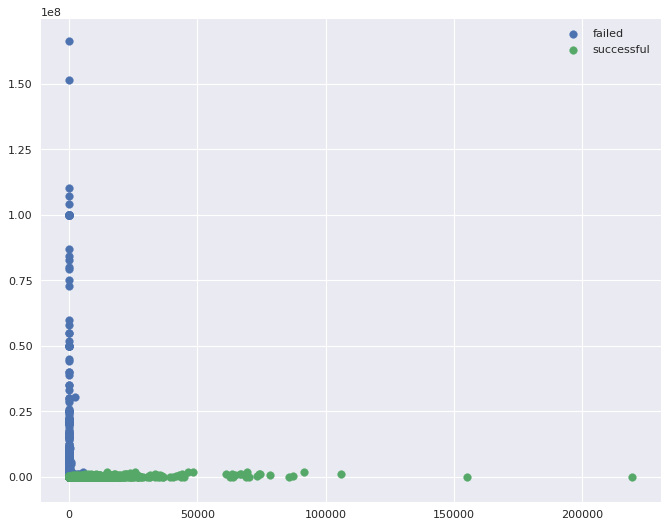

In [153]:
plt.figure(figsize=(10,8), dpi=80)

#for status in df_kickstart['state'].unique():
#    df_aux = df_kickstart[df_kickstart['state']==status] 
#    plt.scatter(df_aux['backers'],df_aux['usd_goal_real'], label=status)
#sns.distplot(df_kickstart.loc[df_kickstart['goal']>0,'goal'])

df_kickstart['year'] = df_kickstart['launched'].dt.year
df_kickstart['usd_goal_real_log'] = np.log(df_kickstart['usd_goal_real'])
#for status in df_kickstart['state'].unique():
    #df_aux = df_kickstart[df_kickstart['state']==status] 
    #plt.scatter(df_aux['launched'].dt.year,df_aux['usd_goal_real'], label=status)
sns.stripplot(x='year', y='usd_goal_real_log', data=df_kickstart, hue='state', jitter=1)
#sns.distplot(df_kickstart.loc[df_kickstart['goal']>0,'goal'])
del df_kickstart['year']
del df_kickstart['usd_goal_real_log']
plt.legend()
plt.show()

plt.legend()
plt.show()

There are some projects that asks for too much money. And all of them had failed. We can check some of them to see what they are all about

In [6]:
df_kickstart.sort_values('usd_goal_real', ascending=False).head(10)

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
47803,1243678698,FUCK Potato Salad. Paleo Potato Brownies!,Food,Food,GBP,2014-08-08,99000000.0,2014-07-09 00:24:34,0.0,failed,0,GB,0.00,0.00,1.663614e+08
196531,2000749004,A Celtic Lovestory,Drama,Film & Video,GBP,2015-11-30,100000000.0,2015-11-17 00:47:15,0.0,failed,0,GB,0.00,0.00,1.513959e+08
367928,944541075,Hydroponic's Skyscraper(un gratte-ciel hydropo...,Technology,Technology,EUR,2015-10-24,100000000.0,2015-08-25 23:52:30,2.0,failed,2,FR,2.29,2.20,1.101698e+08
222208,2132015082,DER NEANDERTALER (Kinofilm mit Starbesetzung i...,Movie Theaters,Film & Video,EUR,2017-03-14,100000000.0,2017-01-13 20:08:41,36.0,failed,2,DE,1.06,38.65,1.073699e+08
226161,219702078,Kitchen from Austria in Switzerland,Restaurants,Food,CHF,2015-10-05,100000000.0,2015-08-06 19:12:10,0.0,failed,0,CH,0.00,0.00,1.040572e+08
371478,962949560,"""PG"" Reanimated Cartoons Tha Movie",Animation,Film & Video,USD,2015-04-11,100000000.0,2015-02-10 23:49:30,0.0,failed,0,US,0.00,0.00,1.000000e+08
257518,379409641,Peace,Film & Video,Film & Video,USD,2017-09-13,100000000.0,2017-08-14 16:46:05,1.0,failed,1,US,0.00,1.00,1.000000e+08
158459,1806062709,The Return Of The Bell Witch Movie,Shorts,Film & Video,USD,2014-05-09,100000000.0,2014-04-09 18:59:51,1.0,failed,1,US,1.00,1.00,1.000000e+08
367253,941328479,The Throne : Fall of Lucifer,Movie Theaters,Film & Video,USD,2017-10-13,100000000.0,2017-08-14 16:45:32,0.0,failed,0,US,0.00,0.00,1.000000e+08
211026,2075450016,"Virtual Reality Playground in Buffalo, NY",Live Games,Games,USD,2015-06-28,100000000.0,2015-05-14 02:31:39,20.0,failed,1,US,20.00,20.00,1.000000e+08


Most of these projects are not real projects. They are probably some joke. We can remove them from the dataset or leave it for the machine learn that joke projects are probably going to fail. 

Now lets check how the main category behavior through the data.

In [5]:
df_kickstart['category'].unique().size

159

Category values: [Publishing, Film & Video, Music, Food, Crafts, ..., Art, Photography, Technology, Dance, Journalism]
Length: 15
Categories (15, object): [Publishing, Film & Video, Music, Food, ..., Photography, Technology, Dance, Journalism]


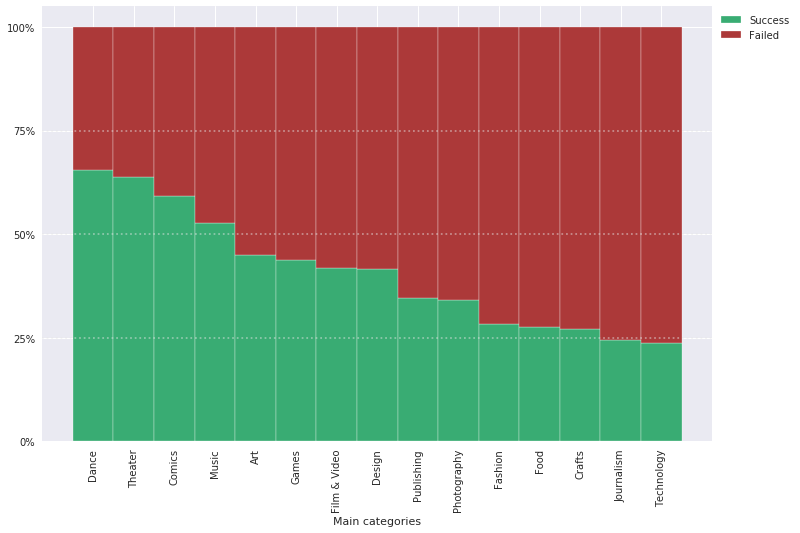

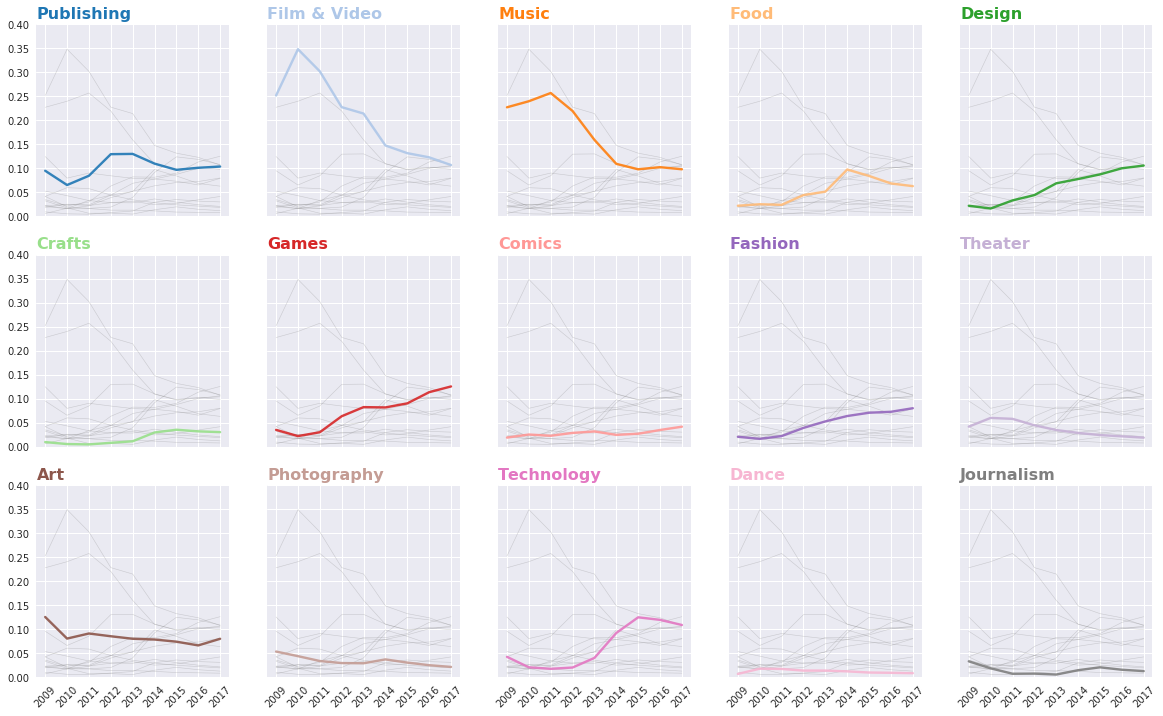

In [63]:
print('Category values: {}'.format(df_kickstart['main_category'].unique()))

# barplot of state from each main category
df_aux = df_kickstart.groupby(['main_category', 'state'], as_index=False).size().reset_index(name='count')
df_aux['percentage'] = df_aux.apply(lambda x: x['count']/df_aux.loc[df_aux['main_category']==x['main_category'],'count'].sum(), axis=1)


plt.figure(figsize=(12,8))
barWidth = 1
df_aux = df_aux.sort_values(['state', 'percentage'], ascending=False)
plt.bar(range(0, df_kickstart['main_category'].unique().size), df_aux.loc[df_aux['state']=='successful','percentage'], color='#39ac73', edgecolor='white',  label='Success',  width=barWidth)
df_aux = df_aux.sort_values(['state', 'percentage'], ascending=[True, True])
plt.bar(range(0,df_kickstart['main_category'].unique().size), df_aux.loc[df_aux['state']=='failed','percentage'], bottom=df_aux.loc[df_aux['state']=='successful','percentage'].sort_values(ascending=False), color='#ac3939', edgecolor='white',  label='Failed',  width=barWidth)
plt.xticks(range(0,df_kickstart['main_category'].unique().size), df_aux['main_category'].unique(), rotation=90)
plt.axhline(y=0.25, color='#e6e6e6', linestyle=':', alpha=0.5)
plt.axhline(y=0.5, color='#e6e6e6', linestyle=':', alpha=0.5)
plt.axhline(y=0.75, color='#e6e6e6', linestyle=':', alpha=0.5)
plt.xlabel('Main categories')
plt.yticks([0, 0.25, 0.5, 0.75, 1], ['0%', '25%', '50%', '75%', '100%'])

plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)
plt.show()


# lineplot of percentage of each main category through the years
plt.figure(figsize=(20,12))

df_aux = df_kickstart.groupby([df_kickstart['launched'].dt.year, 'main_category'], as_index=False).size().reset_index(name='count')#/df_kickstart['launched'].sort_values().dt.year.value_counts(sort=False)
df_aux['percentage'] = df_aux.apply(lambda x: x['count']/df_aux.loc[df_aux['launched']==x['launched'],'count'].sum(), axis=1)
palette = plt.get_cmap('tab20')

num=0
for category in df_aux['main_category'].unique():
    num+=1
    plt.subplot(3,5, num)
 
    for other_category in df_aux.loc[df_aux['main_category']!=category,'main_category'].unique():
        df_plot = df_aux[df_aux['main_category']==other_category] 
        plt.plot(df_plot['launched'], df_plot['percentage'], marker='', color='grey', linewidth=0.6, alpha=0.3)
 
    df_plot = df_aux[df_aux['main_category']==category] 
    plt.plot(df_plot['launched'], df_plot['percentage'], marker='', color=palette(num-1), linewidth=2.4, alpha=0.9, label=category)
 
    plt.ylim(0,0.4)
    plt.xticks(df_kickstart['launched'].sort_values().dt.year.unique(), rotation=45)

    if num in range(11) :
        plt.tick_params(labelbottom='off')
    if num not in [1,6,11] :
        plt.tick_params(labelleft='off')

    plt.title(category, loc='left', fontsize=16, fontweight=0,weight='bold', color=palette(num-1) )
#fontproperties='bold', 

plt.show()

There are several information provided by these two graphs. The first one is that most of the main category has more failed projects than sucessful. But <i>Music</i>, <i>Comics</i>, <i>Theater</i> and <i>Dance</i> has more sucessful projects. There are few <i>Dance</i> projects on total, but they have more chance of success than the others.

<i>Technology</i> and <i>Journalism</i> has more chances to fail than the others categories. Looking through the years, the number of <i>Technology</i> projects increases from 2013 forward, but the number of <i>Journalism</i> projects remains low. On the first years of Kickstart, <i>Film & Video</i>, <i>Music</i> and <i>Art</i> projects were more frequent than the others, but the number of <i>Games</i>, <i>Design</i> and <i>Technology</i> projects has increase until 2017.

Now lets check the relation between the project goal, how much was pledged and how many projects exists in each main category.

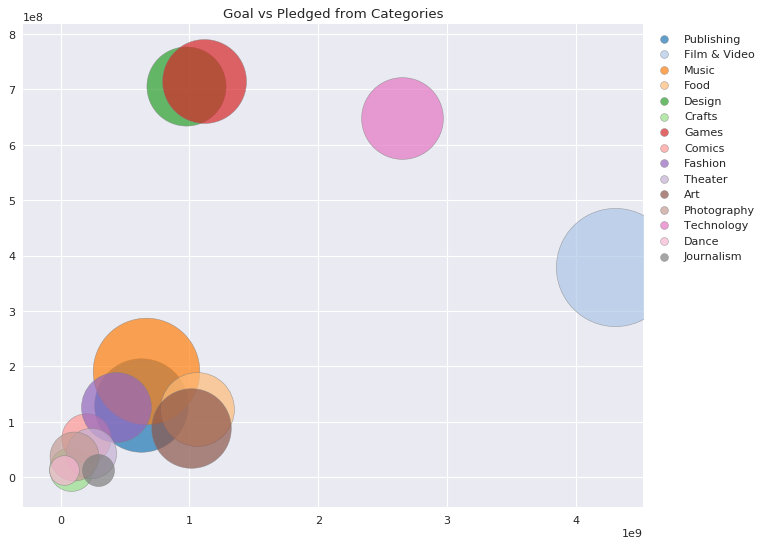

In [62]:
plt.figure(figsize=(10,8), dpi=80)

df_aux = df_kickstart.groupby(['main_category'], as_index=False).agg({'usd_pledged_real' : 'sum','usd_goal_real' : 'sum','ID' : 'count'})
palette = plt.get_cmap('tab20')



for status in df_aux['main_category'].unique():
    df_plot = df_aux[df_aux['main_category']==status] 
    plt.scatter(df_plot['usd_goal_real'],df_plot['usd_pledged_real'], label=status, s=df_plot['ID']/5,color=palette(df_plot.index), alpha=0.7,  edgecolors="grey", linewidth=0.5)
#sns.distplot(df_kickstart.loc[df_kickstart['goal']>0,'goal'])


legend = plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)
for legend_handle in legend.legendHandles:
    legend_handle._sizes=[50]
    
plt.title('Goal vs Pledged from Categories')
plt.show()

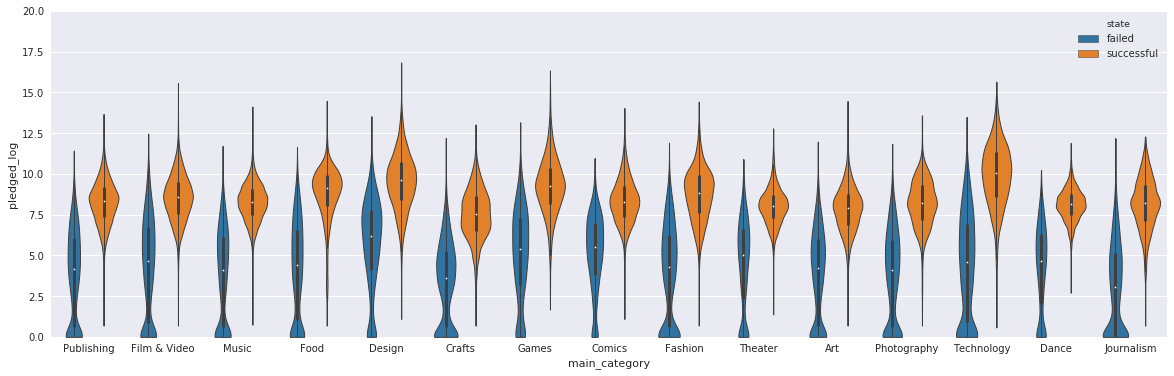

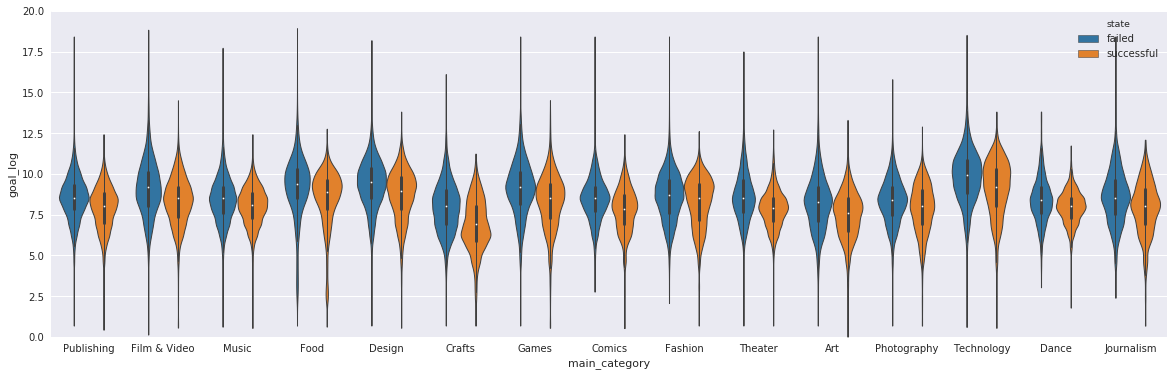

In [10]:
df_kickstart['pledged_log'] = np.log(df_kickstart['usd_pledged_real']+ 1)
df_kickstart['goal_log'] = np.log(df_kickstart['usd_goal_real']+ 1)

plt.figure(figsize=(20,6))
ax = sns.violinplot(data=df_kickstart, x='main_category', y='pledged_log', palette="tab10", bw=.2, cut=0, linewidth=1, hue='state', scale_hue=True)
ax.set_ylim(0,20)
plt.show()

plt.figure(figsize=(20,6))
ax = sns.violinplot(data=df_kickstart, x='main_category', y='goal_log', palette="tab10", bw=.2, cut=0, linewidth=1, hue='state', scale_hue=True)
ax.set_ylim(0,20)
plt.show()



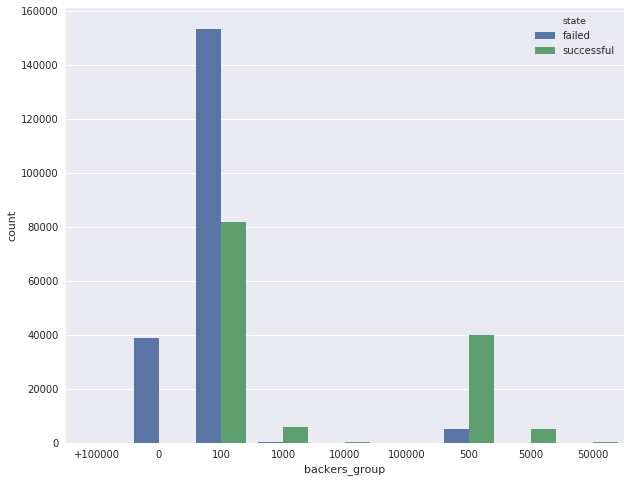

AttributeError: 'function' object has no attribute 'reset_index'

In [14]:
def get_limit(backers):
    try:
        return str([x for x in [0, 100, 500, 1000, 5000, 10000, 50000, 100000] if x >= backers][0])
    except:
        return '+100000'
    

df_kickstart['backers_group'] = df_kickstart['backers'].apply(get_limit)

df_kickstart['backers_group'].value_counts(normalize=True)
plt.figure(figsize=(10,8))
sns.countplot(x='backers_group', data=df_kickstart.sort_values('backers_group'), hue='state')
plt.show()

df_kickstart.groupby(['backers_group', 'state'], as_index=False).size.reset_index(name='count')

In [19]:
df_dx = df_kickstart.groupby(['backers_group', 'state'], as_index=False).size().reset_index(name='count')
for b in df_dx['backers_group'].unique():
    df_dx.loc[df_dx['backers_group']==b,'percentage'] =df_dx.loc[df_dx['backers_group']==b,'count']/df_dx.loc[df_dx['backers_group']==b,'count'].sum()
df_dx

,backers_group,state,count,percentage
0,+100000,successful,3,1.000000
1,0,failed,38742,0.997297
2,0,successful,105,0.002703
3,100,failed,153442,0.651730
4,100,successful,81996,0.348270
5,1000,failed,284,0.044972
6,1000,successful,6031,0.955028
7,10000,failed,7,0.013834
8,10000,successful,499,0.986166
9,100000,successful,17,1.000000


TypeError: unsupported operand type(s) for /: 'str' and 'int'

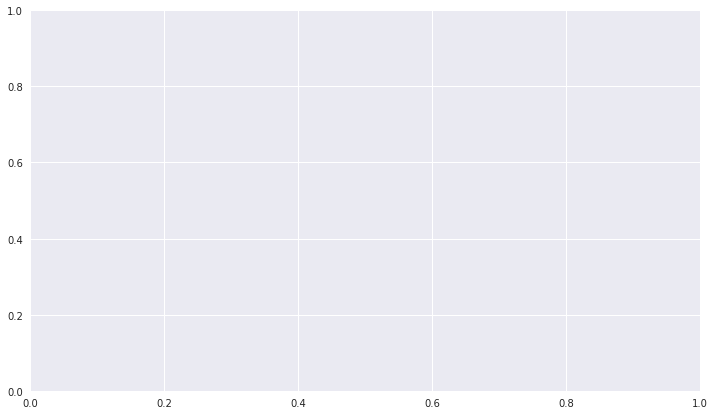

In [44]:
df_kickstart.sort_values('usd_pledged_real', ascending=False).head(10)
#plt.hist(np.log(df_kickstart['backers']+1), 50)

plt.figure(figsize=(12,7))
sns.distplot(df_kickstart['backers_group'])
plt.title('Backers log distribution')
plt.show()

The main category with higher goals are from <i>Film & Video</i>, but the categories that get more money are <i>Games</i> and <i>Design</i>. <i>Technology</i> also was a high goal and a high pledge money. The other categories has both low goals and receive less money.

## Insights

bla

In [72]:
df_kickstart['goal_percentage'] = df_kickstart['usd_pledged_real']+1/df_kickstart['usd_goal_real']
df_kickstart['period'] = (df_kickstart['deadline']-df_kickstart['launched']).dt.days
df_kickstart['pledged_per_backer'] = df_kickstart['pledged']/df_kickstart['backers']

del df_kickstart['goal_percentage']
del df_kickstart['goal_percentage']
del df_kickstart['goal_percentage']

In [76]:
df_kickstart.sort_values('goal_percentage', ascending=False)

100*df_kickstart.sort_values('goal_percentage', ascending=False).head(100)['usd_pledged_real'].sum()/df_kickstart['usd_pledged_real'].sum()

12.019910209234633

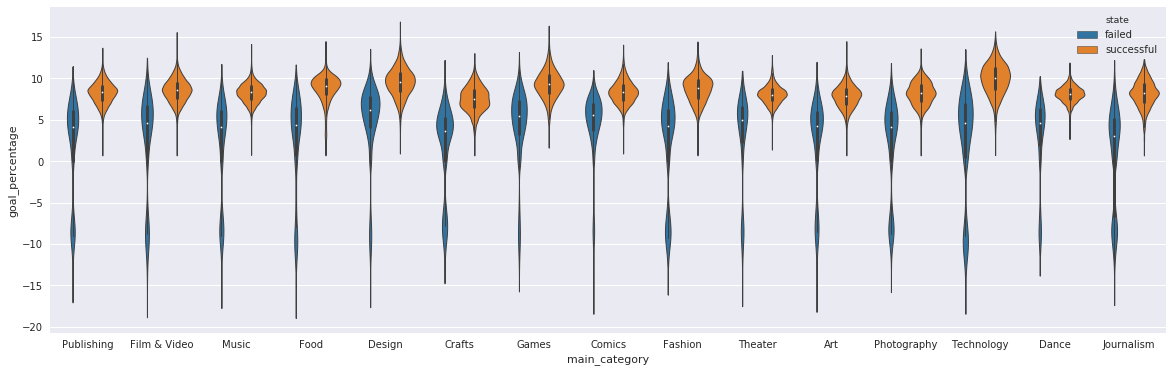

In [69]:
df_kickstart['goal_percentage'] = np.log(df_kickstart['usd_pledged_real']+1/df_kickstart['usd_goal_real'])
plt.figure(figsize=(20,6))
ax = sns.violinplot(data=df_kickstart, x='main_category', y='goal_percentage', palette="tab10", bw=.2, cut=0, linewidth=1, hue='state', scale_hue=True)
#ax.set_ylim(0,20)
plt.show()


# Creating new Features

In [119]:
# criando novas features



# Predicting the Success Rate of a Kickstart project

Now that we understood the data and create new features, lets try to predict the status of a project. 

First lets define a baseline predictor to compare our results. For this example we will use the DummyClassifier. We will evaluate our model though the F1-Score (based on precision and recall values) and Logloss (based on the probability of the target value).

[Poetry, Narrative Film, Music, Restaurants, Food, ..., Taxidermy, Quilts, Chiptune, Residencies, Literary Spaces]
Length: 159
Categories (159, object): [Poetry, Narrative Film, Music, Restaurants, ..., Quilts, Chiptune, Residencies, Literary Spaces]

In [77]:
df_main_dummies = pd.get_dummies(df_kickstart['main_category'])
df_category_dummies = pd.get_dummies(df_kickstart['category'])

df_kickstart_predict = pd.concat([df_kickstart, df_main_dummies, df_category_dummies], axis=1)
df_kickstart_predict.head()
df_kickstart_predict['year'] = df_kickstart_predict['launched'].dt.year
df_kickstart_predict['month'] = df_kickstart_predict['launched'].dt.month

In [28]:
df_main_dummies = pd.get_dummies(df_kickstart['main_category'])
df_main_dummies.head()

,Publishing,Film & Video,Music,Food,Design,Crafts,Games,Comics,Fashion,Theater,Art,Photography,Technology,Dance,Journalism
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [78]:
cols = []
[cols.append(x) for x in df_main_dummies.columns]
[cols.append(x) for x in df_category_dummies.columns]
cols.append('usd_goal_real')
#cols.append('backers')
cols.append('period')
cols.append('year')
cols.append('month')
df_kickstart_predict[cols].info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 331675 entries, 0 to 378660
Columns: 208 entries, Publishing to month
dtypes: float64(1), int64(3), uint8(204)
memory usage: 87.2 MB


In [22]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import log_loss
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.utils import check_X_y

def print_model_results(model, _X_test, _y_test):
    print('\tF1-Score for model: {:.4f}'.format(f1_score(_y_test, model.predict(_X_test), average='micro')))
    print('\tLog Loss score for model: {:.4f}'.format(log_loss(_y_test,model.predict_proba(_X_test))))
    print('\tClassification report:')
    #_y_test = [0 if x==model.classes_[0] else 1 for x in _y_test ]
    #print(_y_test)
    print(classification_report(_y_test, model.predict(_X_test)))
    #print(classification_report(model.predict_proba(_X_test), _y_test))
df_kickstart_predict = df_kickstart.copy()

features = ['backers']
target = ['state']

#X = df_kickstart_predict[cols]
X = df_kickstart_predict[features]
y = df_kickstart_predict[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

In [90]:


X_train_trans, y_train_trans = check_X_y(X=X_train, y=y_train)
X_test_trans, y_test_trans = check_X_y(X=X_test, y=y_test)

dummy_clf = DummyClassifier()
dummy_clf.fit(X_train_trans, y_train_trans)


    
print('Dummy Classifier results:')
print_model_results(dummy_clf, X_test_trans, y_test_trans)
#print(classification_report(y_test_trans, dummy_clf.predict_proba(X_test_trans)))

/home/fernandosiqueira/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Dummy Classifier results:
	F1-Score for model: 0.5165
	Log Loss score for model: 16.6605
	Classification report:
             precision    recall  f1-score   support

     failed       0.60      0.59      0.60     39649
 successful       0.40      0.41      0.40     26686

avg / total       0.52      0.52      0.52     66335



There are a few classifiers that could work on this dataset. For example, we can use Logistic Regression or Decision Tree.

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

logistic_clf = LogisticRegression()
logistic_clf.fit(X_train, y_train)

print('Results of Logistic Regression')
print_model_results(logistic_clf, X_test, y_test)

decisiontree_clf = DecisionTreeClassifier()
decisiontree_clf.fit(X_train, y_train)

print('Results of Decision Tree')
print_model_results(decisiontree_clf, X_test, y_test)

/home/fernandosiqueira/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Results of Logistic Regression
	F1-Score for model: 0.7962
	Log Loss score for model: 0.4752
	Classification report:
             precision    recall  f1-score   support

     failed       0.77      0.94      0.85     39649
 successful       0.87      0.58      0.70     26686

avg / total       0.81      0.80      0.79     66335

Results of Decision Tree
	F1-Score for model: 0.8440
	Log Loss score for model: 0.3749
	Classification report:
             precision    recall  f1-score   support

     failed       0.90      0.83      0.86     39649
 successful       0.78      0.86      0.82     26686

avg / total       0.85      0.84      0.85     66335



In [24]:
#print_model_results(decisiontree_clf, X_train, y_train)
df_feat = pd.DataFrame([list(x) for x in zip(cols, decisiontree_clf.feature_importances_)], columns=['feature', 'importance'])
#df_feat[['feature','importance']] =[list(x) for x in zip(cols, decisiontree_clf.feature_importances_)]
#df_feat = df_feat.append(list([[0,1], [3,5]]))
df_feat.sort_values('importance', ascending=False)



NameError: name 'cols' is not defined

Both models perform poorly without proper configurations. Logistic Regression predict only failed 

In [32]:
from sklearn.ensemble import RandomForestClassifier

random_clf = RandomForestClassifier(n_estimators=100, max_features=None, n_jobs=-1)
random_clf.fit(X_train, y_train)

print('Results of Random Forest')
print_model_results(random_clf, X_test, y_test)

/home/fernandosiqueira/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Results of Random Forest
	F1-Score for model: 0.8441
	Log Loss score for model: 0.3740
	Classification report:
             precision    recall  f1-score   support

     failed       0.90      0.83      0.86     39649
 successful       0.78      0.86      0.82     26686

avg / total       0.85      0.84      0.85     66335



In [27]:
random_clf.feature_importances_

array([1.])

In [37]:
df_kickstart['state'].value_counts(normalize=True)

failed        0.596123
successful    0.403877
Name: state, dtype: float64

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
import math

df_trimmed = df_kickstart.drop(columns=['goal', 'pledged','usd pledged'])

df_dummies = pd.get_dummies(df_trimmed['main_category'])
df_y_dummies = pd.get_dummies(df_trimmed['state'])
df_trimmed = df_trimmed.join(df_dummies)
df_trimmed = df_trimmed.join(df_y_dummies)

X = df_trimmed.iloc[:,11:27]
y = df_trimmed.iloc[:,27]

Xarr = X.values
yarr = y.values


# Make a train/test split using 30% test size
X_train2, X_test2, y_train2, y_test2 = train_test_split(Xarr,yarr, test_size=0.3, random_state = 0)
                                            


clf = DecisionTreeClassifier(max_depth=None, min_samples_split=2,random_state=0)
clf.fit(X_train2,y_train2)

print_model_results(clf, X_test2, y_test2)

	F1-Score for model: 1.0000
	Log Loss score for model: 0.0000
	Classification report:
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     98270
          1       1.00      1.00      1.00      1233

avg / total       1.00      1.00      1.00     99503



In [31]:
df_trimmed

,ID,name,category,main_category,currency,deadline,launched,state,backers,country,...,Comics,Fashion,Theater,Art,Photography,Technology,Dance,Journalism,failed,successful
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,2015-08-11 12:12:28,failed,0,GB,...,0,0,0,0,0,0,0,0,1,0
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,2017-09-02 04:43:57,failed,15,US,...,0,0,0,0,0,0,0,0,1,0
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,2013-01-12 00:20:50,failed,3,US,...,0,0,0,0,0,0,0,0,1,0
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,2012-03-17 03:24:11,failed,1,US,...,0,0,0,0,0,0,0,0,1,0
5,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01,2016-02-26 13:38:27,successful,224,US,...,0,0,0,0,0,0,0,0,0,1
6,1000023410,Support Solar Roasted Coffee & Green Energy! ...,Food,Food,USD,2014-12-21,2014-12-01 18:30:44,successful,16,US,...,0,0,0,0,0,0,0,0,0,1
7,1000030581,Chaser Strips. Our Strips make Shots their B*tch!,Drinks,Food,USD,2016-03-17,2016-02-01 20:05:12,failed,40,US,...,0,0,0,0,0,0,0,0,1,0
10,100004721,Of Jesus and Madmen,Nonfiction,Publishing,CAD,2013-10-09,2013-09-09 18:19:37,failed,0,CA,...,0,0,0,0,0,0,0,0,1,0
11,100005484,Lisa Lim New CD!,Indie Rock,Music,USD,2013-04-08,2013-03-09 06:42:58,successful,100,US,...,0,0,0,0,0,0,0,0,0,1
12,1000055792,The Cottage Market,Crafts,Crafts,USD,2014-10-02,2014-09-02 17:11:50,failed,0,US,...,0,0,0,0,0,0,0,0,1,0


In [91]:
X.describe()

,usd_goal_real,goal_percentage,period,pledged_per_backer,Publishing,Film & Video,Music,Food,Design,Crafts,Games,Comics,Fashion,Theater,Art,Photography
count,3.316750e+05,3.316750e+05,331675.000000,2.930190e+05,331675.000000,331675.000000,331675.000000,331675.000000,331675.000000,331675.000000,331675.000000,331675.000000,331675.000000,331675.000000,331675.000000,331675.000000
mean,4.151000e+04,9.943464e+03,32.954902,inf,0.106867,0.170429,0.138536,0.066493,0.076472,0.023571,0.085991,0.029782,0.059622,0.030880,0.077308,0.029212
std,1.108930e+06,9.673293e+04,12.713329,NaN,0.308944,0.376010,0.345462,0.249142,0.265753,0.151709,0.280351,0.169986,0.236785,0.172992,0.267079,0.168401
min,1.000000e-02,6.011010e-09,0.000000,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000e+03,5.000003e+01,29.000000,2.500000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.000000e+03,7.880002e+02,29.000000,4.867273e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.500000e+04,4.608000e+03,35.000000,8.553262e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.663614e+08,2.033899e+07,91.000000,inf,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [81]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

learner = RandomForestClassifier(n_jobs=-1, oob_score=True)
parameters = {'n_estimators':[100, 500, 1000], 'max_features': [0.5, 'log2','sqrt'], 'criterion': ['gini', 'entropy']}
grid = GridSearchCV(learner,parameters, cv=4)
grid.fit(X_train, y_train)

print('Time to apply GridSearch  {:.4f} seconds'.format(end-start))    
print("r2 / variance : ", grid.best_score_)
print("best param : ", grid.best_params_)
print("best estimator : ", grid.best_estimator_)

print_model_results(grid.best_estimator_, X_test, y_test)

/home/fernandosiqueira/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/fernandosiqueira/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/fernandosiqueira/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/fernandosiqueira/anaconda3/lib/python3.6/site-packages/sklearn/model_s

KeyboardInterrupt: 